In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = pd.date_range(start = '2020-01-01', periods = 36, freq = 'M')
sales = np.random.randint(100,200, size = len(dates))
data = pd.DataFrame({'Date': dates, 'Sales': sales})
data.set_index('Date', inplace = True)

In [4]:
data['Moving_Average'] = data['Sales'].rolling(window=12, center = True).mean()

data['Ratio'] = data['Sales'] / data['Moving_Average']
monthly_avg = data.groupby(data.index.month)['Ratio'].mean()
seasonal_indices = monthly_avg / monthly_avg.mean()

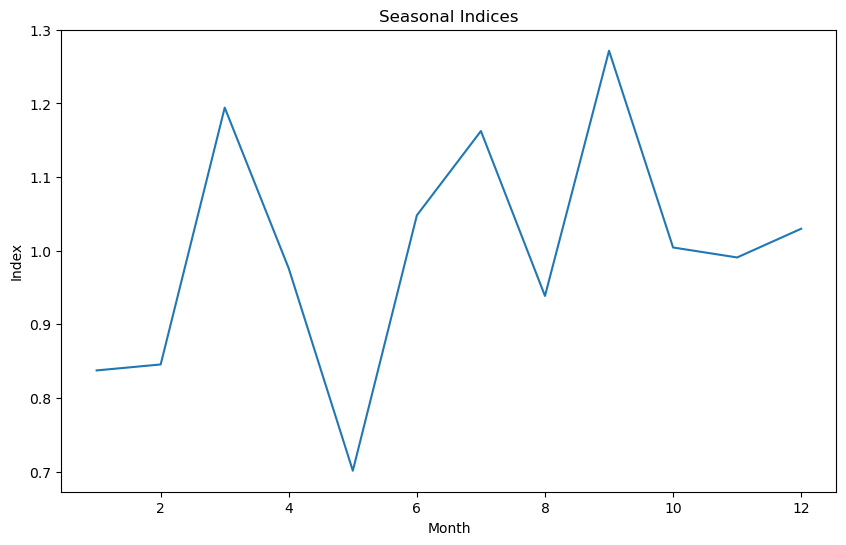

In [7]:
plt.figure(figsize=(10,6))
seasonal_indices.plot(kind='line')
plt.title('Seasonal Indices')
plt.xlabel('Month')
plt.ylabel('Index')
plt.show()

trend_forecast = np.linspace(start=data['Sales'].iloc[-1], stop = data['Sales'].iloc[-1]*1.1, num=12)
seasonal_forecast = trend_forecast * seasonal_indices.values

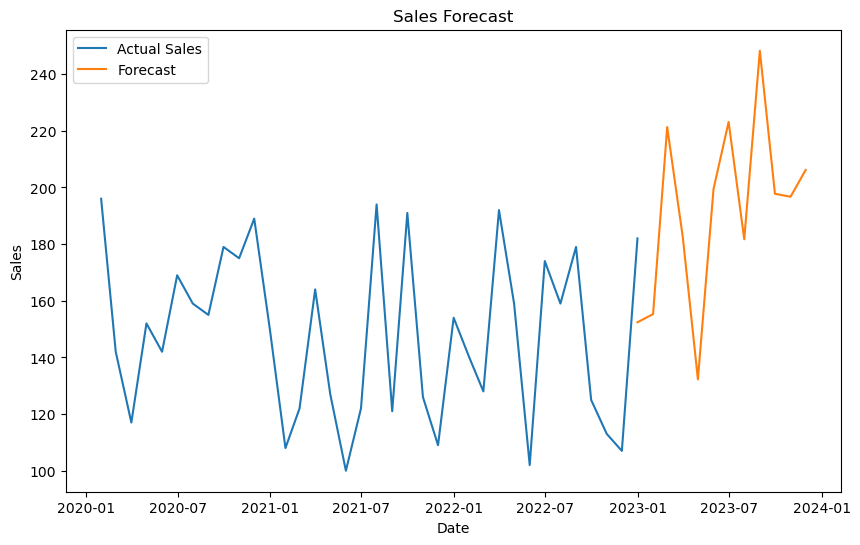

In [8]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Sales'], label = 'Actual Sales')
plt.plot(pd.date_range(start = data.index[-1], periods=12, freq='M'), seasonal_forecast,label = 'Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()